In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# datamodeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# model selection
from sklearn.model_selection import cross_val_scor
from sklearn.model_selection import StratifiedKFol
from sklearn.model_selection import GridSearchCV

# metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
data = pd.read_excel("/home/slava/Загрузки/WA_Fn-UseC_-HR-Employee-Attrition.xlsx")

In [4]:
df = data.copy()

In [5]:
df.shape

(1470, 35)

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [10]:
# deleting columns with nunicue=1
df = df.drop(["EmployeeCount", "Over18", "StandardHours", "EmployeeNumber"], 1)


In [11]:
# counting missing values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

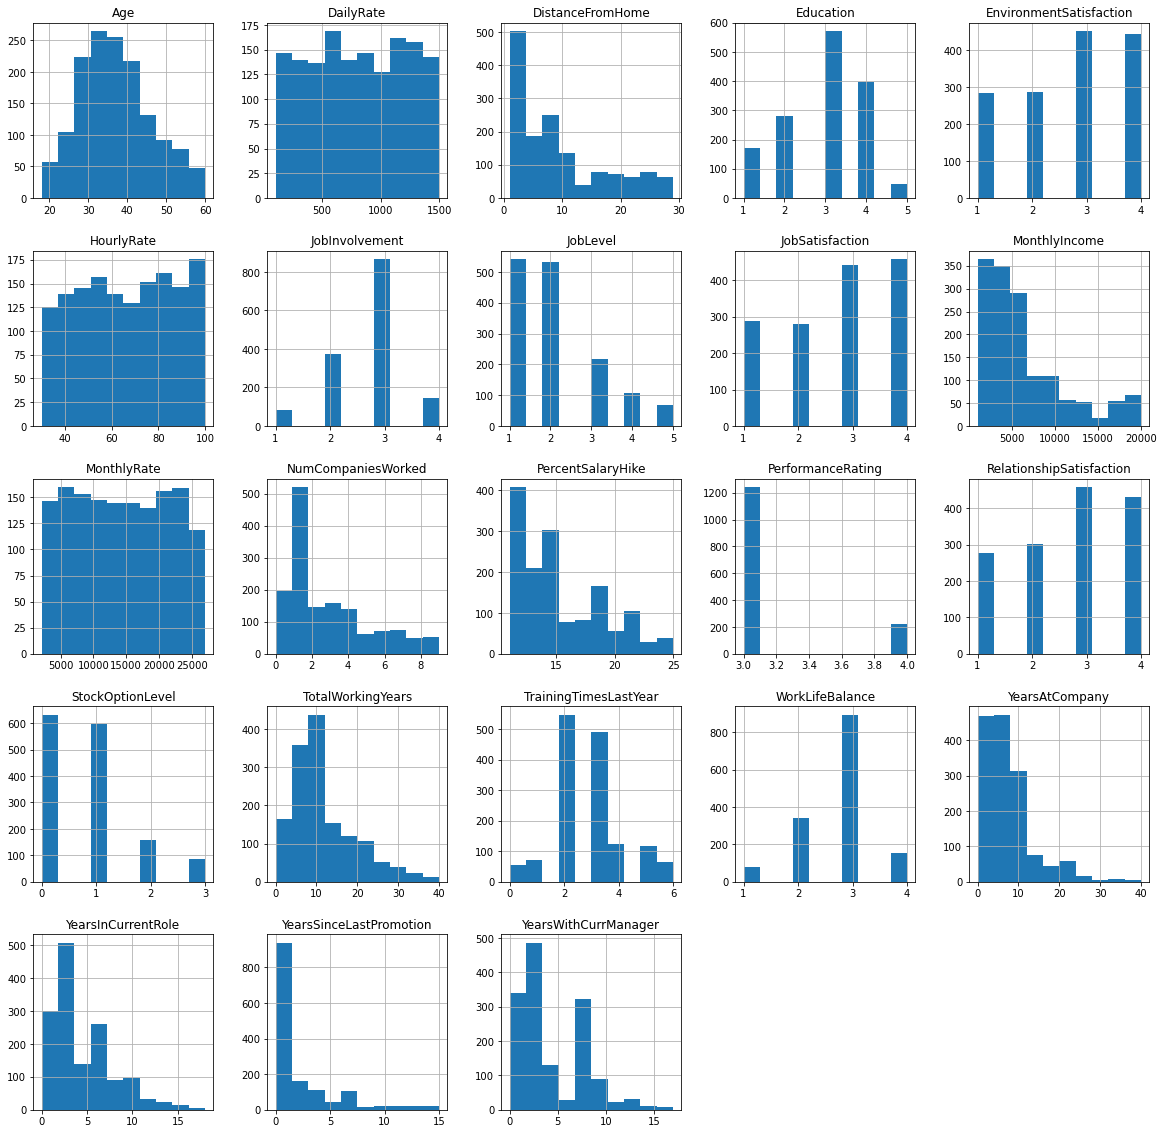

In [12]:
df.hist(figsize=(20, 20))
plt.show()

<AxesSubplot:xlabel='Attrition', ylabel='count'>

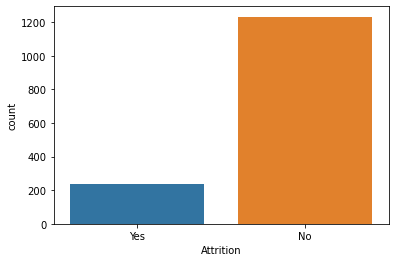

In [13]:
# the ratio of active employees and ex-employees
sns.countplot(x=df["Attrition"])

## Age

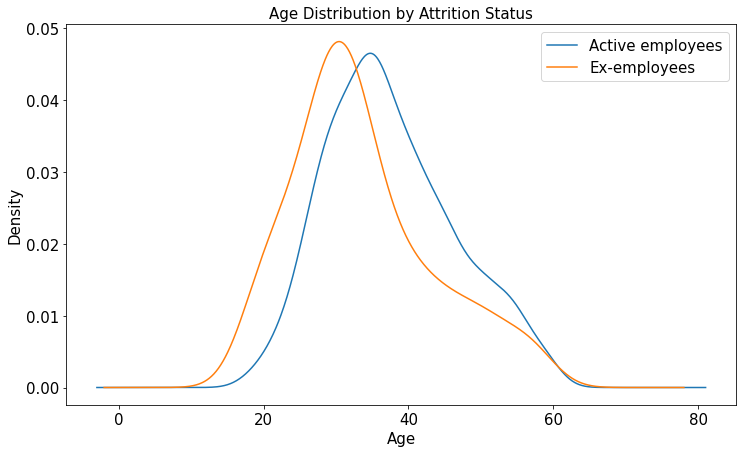

In [14]:
# age distribution 
df.groupby("Attrition")["Age"].plot(kind="kde", figsize=(12, 7), fontsize=15)
plt.legend(["Active employees", "Ex-employees"], fontsize=15)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.title("Age Distribution by Attrition Status", fontsize=15)
plt.show()

## Gender

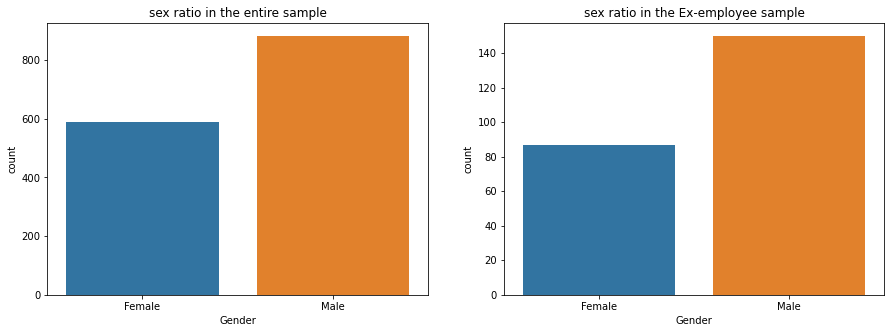

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(ax=ax1, x=df["Gender"])
ax1.set_title("sex ratio in the entire sample")

sns.countplot(ax=ax2, x=df[df["Attrition"] == "Yes"]["Gender"])
ax2.set_title("sex ratio in the Ex-employee sample")
plt.show()

Gender  Attrition
Female  No           0.852041
        Yes          0.147959
Male    No           0.829932
        Yes          0.170068
Name: Attrition, dtype: float64


[]

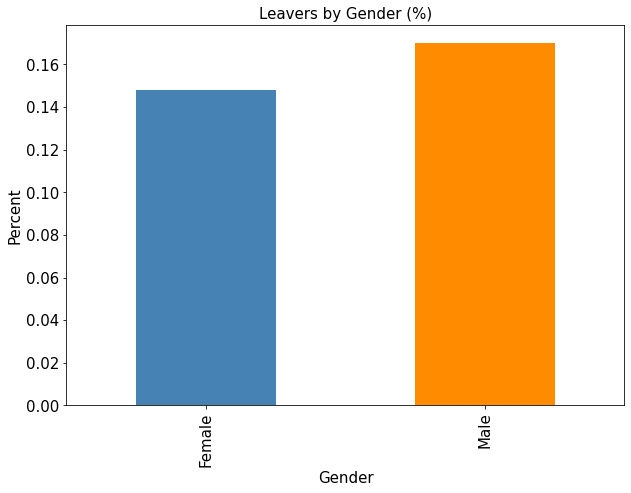

In [16]:
# percentage of active employees and ex-employees, depending on gender
df_gb_gender = df.groupby("Gender")["Attrition"].value_counts(normalize=True)
print(df_gb_gender)

# distribution by Gender among Ex-employees
exempl_gb_gender = df_gb_gender[[1, 3]]
exempl_gb_gender.index = ["Female", "Male"]

exempl_gb_gender.plot(
    kind="bar", color=["steelblue", "darkorange"], figsize=(10, 7), fontsize=15
)
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Percent", fontsize=15)
plt.title("Leavers by Gender (%)", fontsize=15)
plt.plot()

## Marital status

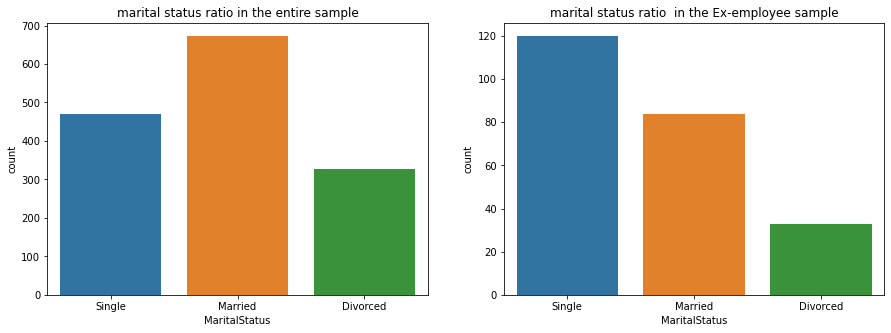

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(ax=ax1, x=df["MaritalStatus"])
ax1.set_title("marital status ratio in the entire sample")

sns.countplot(ax=ax2, x=df[df["Attrition"] == "Yes"]["MaritalStatus"])
ax2.set_title("marital status ratio  in the Ex-employee sample")
plt.show()

MaritalStatus  Attrition
Divorced       No           0.899083
               Yes          0.100917
Married        No           0.875186
               Yes          0.124814
Single         No           0.744681
               Yes          0.255319
Name: Attrition, dtype: float64


[]

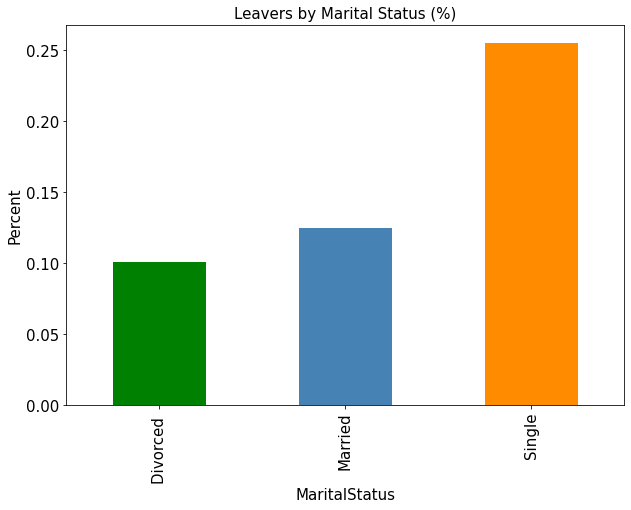

In [18]:
# percentage of active employees and ex-employees, depending on marital status
df_gb_mrstatus = df.groupby("MaritalStatus")["Attrition"].value_counts(normalize=True)
print(df_gb_mrstatus)

# distribution by MaritalStatus among Ex-employees
exempl_gb_mrstatus = df_gb_mrstatus[[1, 3, 5]]
exempl_gb_mrstatus.index = ["Divorced ", "Married", "Single"]

exempl_gb_mrstatus.plot(
    kind="bar", color=["green","steelblue", "darkorange"], figsize=(10, 7), fontsize=15
)
plt.xlabel("MaritalStatus", fontsize=15)
plt.ylabel("Percent", fontsize=15)
plt.title("Leavers by Marital Status (%)", fontsize=15)
plt.plot()

## Overtime

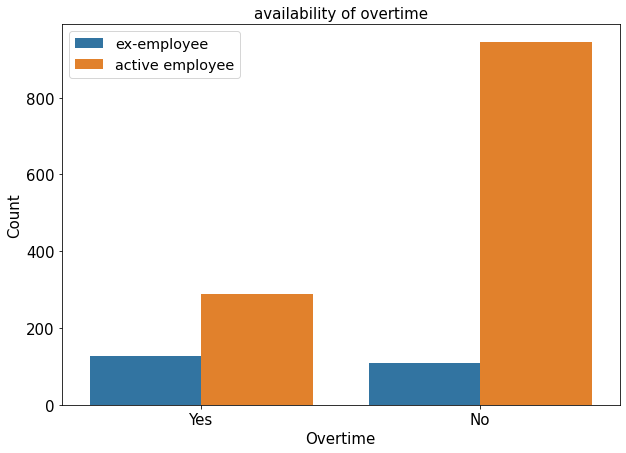

In [19]:
# number of employees with overtime
plt.figure(figsize=(10, 7))
sns.countplot(x=df["OverTime"], hue=df["Attrition"])
plt.title("availability of overtime", fontsize=15)
plt.legend(["ex-employee", "active employee"],fontsize="x-large")
plt.xlabel("Overtime", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

OverTime  Attrition
No        No           0.895636
          Yes          0.104364
Yes       No           0.694712
          Yes          0.305288
Name: Attrition, dtype: float64


[]

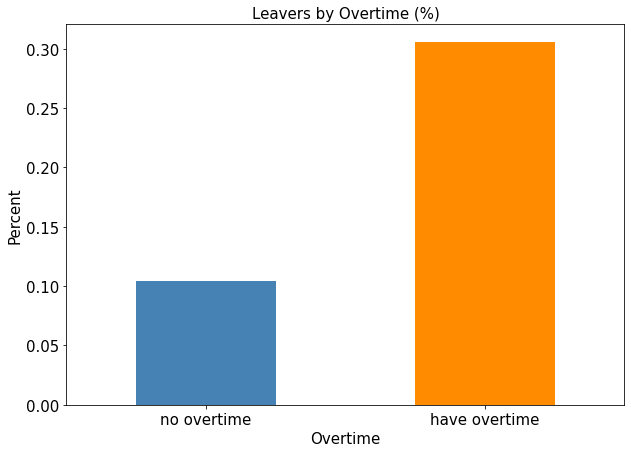

In [20]:
# percentage of active employees and ex-employees, depending on overtime
df_gb_overtime = df.groupby("OverTime")["Attrition"].value_counts(normalize=True)
print(df_gb_overtime)

# percentage of ex-employees, depending on overtime
exempl_gb_overtime = df_gb_overtime[[1, 3]]
exempl_gb_overtime.index = ["no overtime", "have overtime"]


exempl_gb_overtime.plot(
    kind="bar", color=["steelblue", "darkorange"], figsize=(10, 7), fontsize=15
)
plt.xlabel("Overtime", fontsize=15)
plt.ylabel("Percent", fontsize=15)
plt.title("Leavers by Overtime (%)", fontsize=15)
plt.xticks(rotation=0)
plt.plot()

## Job role

[]

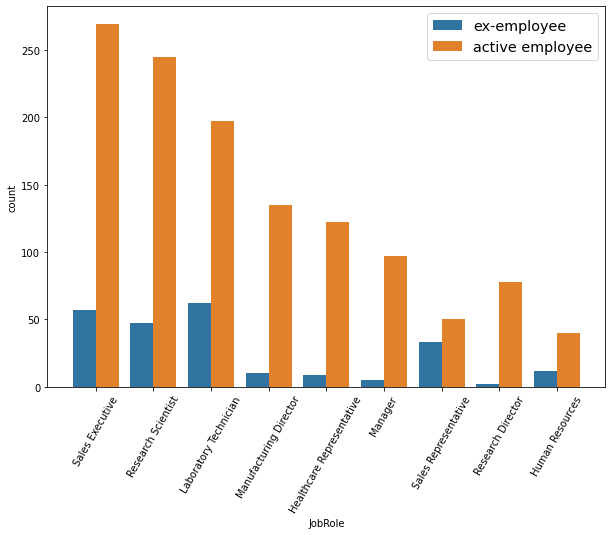

In [21]:
plt.figure(figsize=(10, 7))
sns.countplot(x=df["JobRole"], hue=df["Attrition"])
plt.xticks(rotation=60)
plt.legend(["ex-employee", "active employee"],fontsize="x-large")
plt.plot()

In [22]:
# percentage of active employees and ex-employees, depending on job role
df.groupby("JobRole")["Attrition"].value_counts(normalize=True)

JobRole                    Attrition
Healthcare Representative  No           0.931298
                           Yes          0.068702
Human Resources            No           0.769231
                           Yes          0.230769
Laboratory Technician      No           0.760618
                           Yes          0.239382
Manager                    No           0.950980
                           Yes          0.049020
Manufacturing Director     No           0.931034
                           Yes          0.068966
Research Director          No           0.975000
                           Yes          0.025000
Research Scientist         No           0.839041
                           Yes          0.160959
Sales Executive            No           0.825153
                           Yes          0.174847
Sales Representative       No           0.602410
                           Yes          0.397590
Name: Attrition, dtype: float64

[]

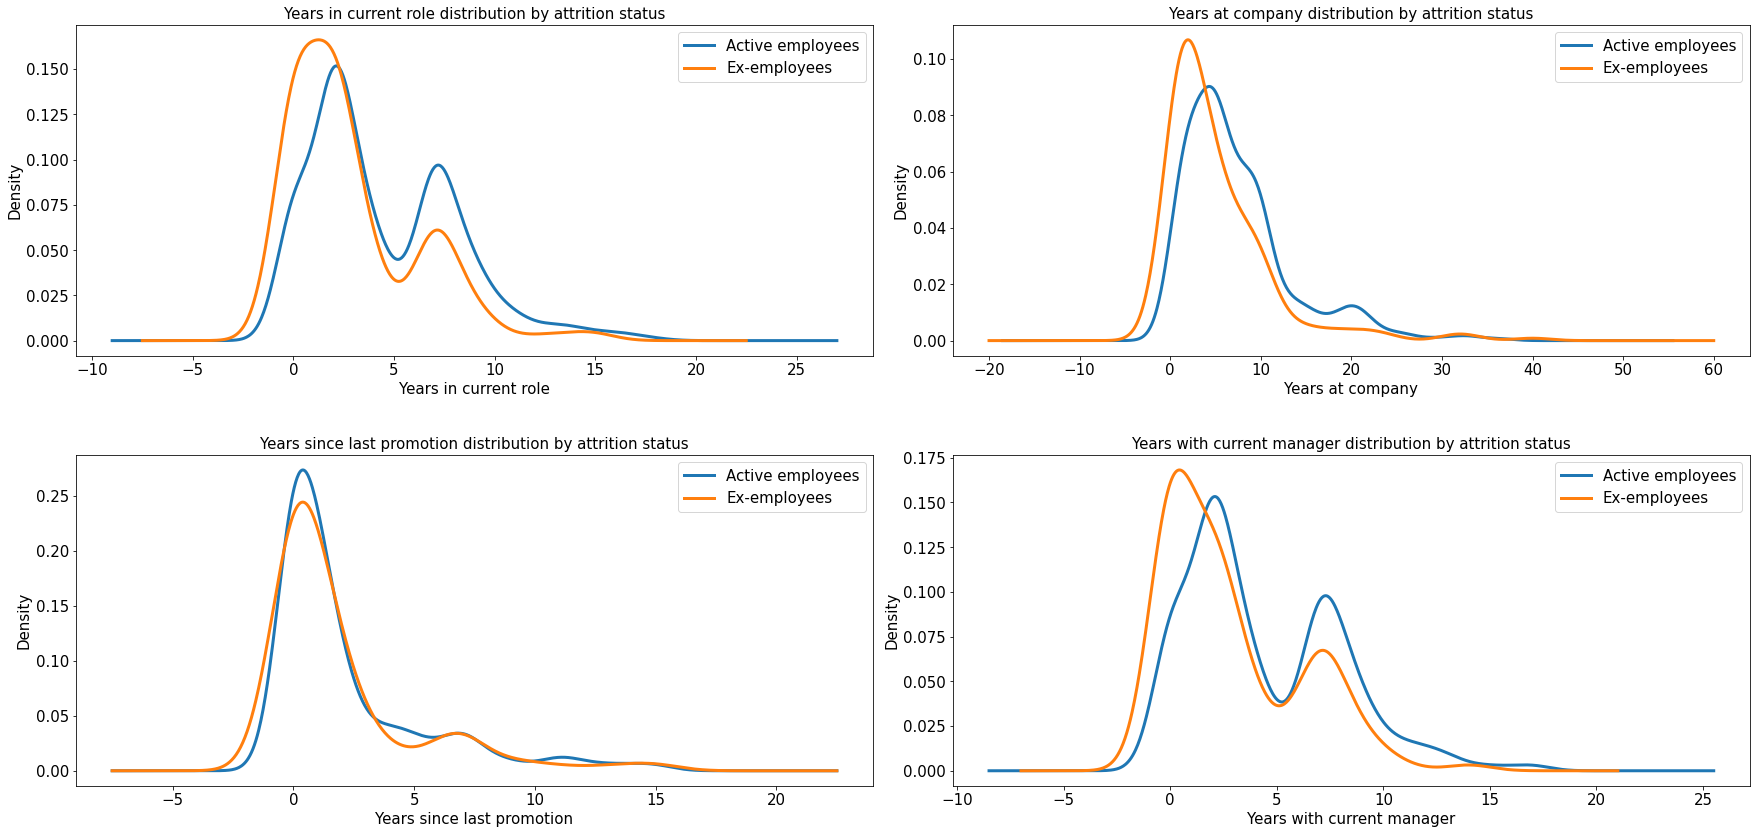

In [23]:
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(30, 14))
plt.subplots_adjust(wspace=0.1, hspace=0.3) # distance between graphs

df.groupby("Attrition")["YearsInCurrentRole"].plot(ax=ax1, kind="kde", fontsize=15, linewidth=3)
ax1.set_title("Years in current role distribution by attrition status", fontsize=15)
ax1.legend(["Active employees", "Ex-employees"], fontsize=15)
ax1.set_xlabel("Years in current role", fontsize=15)
ax1.set_ylabel("Density", fontsize=15)

df.groupby("Attrition")["YearsAtCompany"].plot(ax=ax2, kind="kde", fontsize=15, linewidth=3)
ax2.set_title("Years at company distribution by attrition status", fontsize=15)
ax2.legend(["Active employees", "Ex-employees"], fontsize=15)
ax2.set_xlabel("Years at company", fontsize=15)
ax2.set_ylabel("Density", fontsize=15)

df.groupby("Attrition")["YearsSinceLastPromotion"].plot(ax=ax3, kind="kde", fontsize=15, linewidth=3)
ax3.set_title("Years since last promotion distribution by attrition status", fontsize=15)
ax3.legend(["Active employees", "Ex-employees"], fontsize=15)
ax3.set_xlabel("Years since last promotion", fontsize=15)
ax3.set_ylabel("Density", fontsize=15)

df.groupby("Attrition")["YearsWithCurrManager"].plot(ax=ax4, kind="kde", fontsize=15, linewidth=3)
ax4.set_title("Years with current manager distribution by attrition status", fontsize=15)
ax4.legend(["Active employees", "Ex-employees"], fontsize=15)
ax4.set_xlabel("Years with current manager", fontsize=15)
ax4.set_ylabel("Density", fontsize=15)
plt.plot()

## WorkLifeBalance

[]

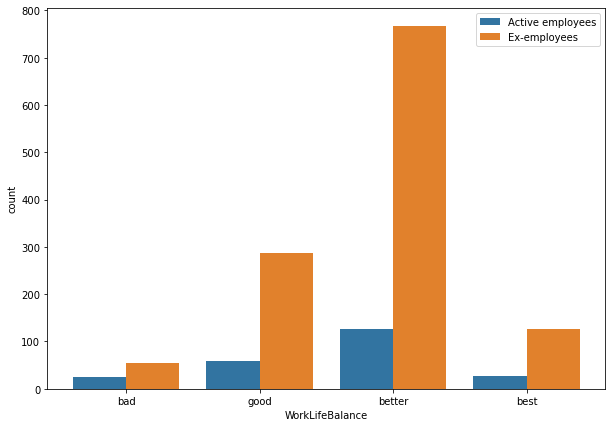

In [24]:
labels = ["bad", "good", "better", "best"]

plt.figure(figsize=(10, 7))
ax = sns.countplot(x=df["WorkLifeBalance"], hue=df["Attrition"])
ax.set_xticklabels(labels=labels)
ax.legend(["Active employees", "Ex-employees"], fontsize=10)

plt.plot()

In [25]:
df.groupby("WorkLifeBalance")["Attrition"].value_counts(normalize=True)

WorkLifeBalance  Attrition
1                No           0.687500
                 Yes          0.312500
2                No           0.831395
                 Yes          0.168605
3                No           0.857783
                 Yes          0.142217
4                No           0.823529
                 Yes          0.176471
Name: Attrition, dtype: float64

In [26]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

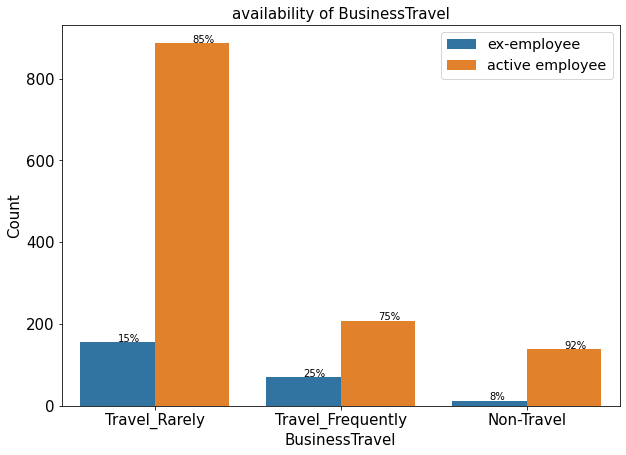

In [27]:
# number of employees with BusinessTravel
plt.figure(figsize=(10, 7))
ax=sns.countplot(x=df["BusinessTravel"], hue=df["Attrition"])
patch = ax.patches
half = int(len(patch)/2)
for i in range(half):
  pat_1= patch[i]
  pat_2 = patch[i+half]
  height_1 = pat_1.get_height()
  height_2 = pat_2.get_height()
  total = height_1  + height_2
  width_1 = pat_1.get_x()+pat_1.get_width()/2
  width_2 = pat_2.get_x()+pat_2.get_width()/2
  ax.text(width_1,height_1+1,"{:.0%}".format(height_1/total))
  ax.text(width_2,height_2+1,"{:.0%}".format(height_2/total))
plt.title("availability of BusinessTravel", fontsize=15)
plt.legend(["ex-employee", "active employee"],fontsize="x-large")
plt.xlabel("BusinessTravel", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

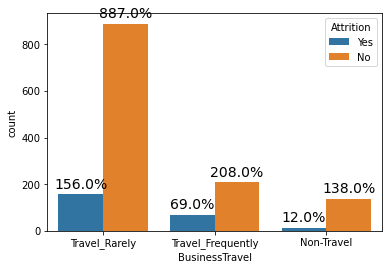

In [28]:
# разобраться
ax=sns.countplot(x=df["BusinessTravel"], hue=df["Attrition"])
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center', # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points', # точка смещения относительно координаты
                fontsize=14)

In [29]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

In [30]:
df.select_dtypes("object").columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [31]:
df_corr = df.drop(df.select_dtypes("object").columns, axis=1)

In [32]:
df_corr["Target"] = df["Attrition"].apply(lambda x: 1 if x=="Yes" else 0)

In [33]:
df_corr["Target"].head(10)

0    1
1    0
2    1
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Target, dtype: int64

In [34]:
corr_matrix = np.triu(df_corr.corr())

<AxesSubplot:>

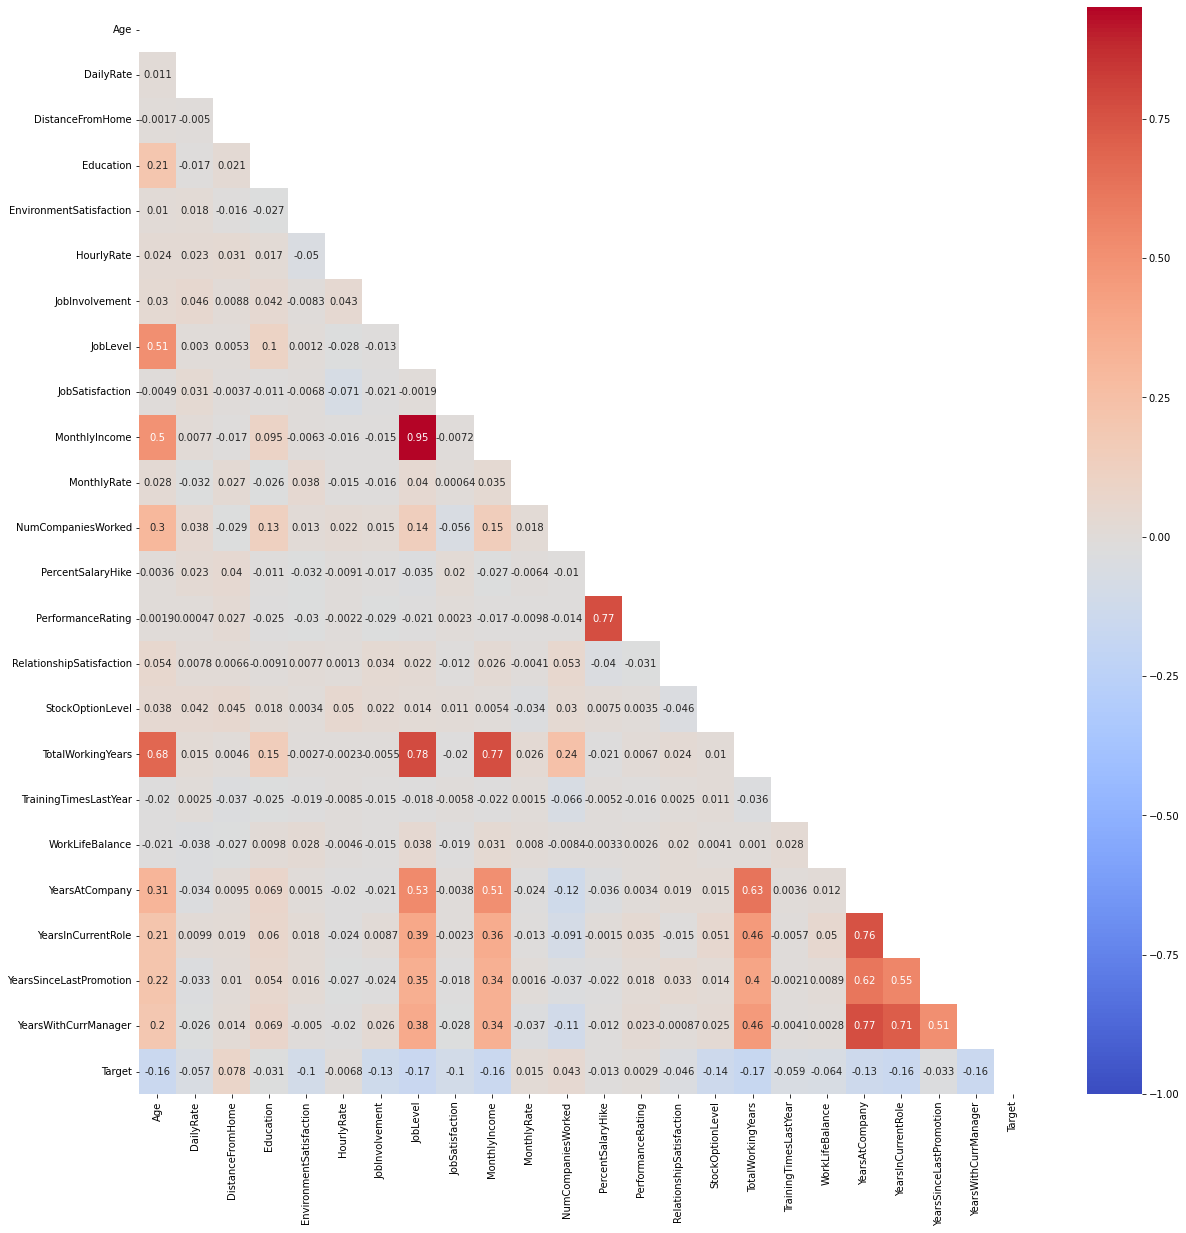

In [35]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_corr.corr(),cmap="coolwarm",mask=corr_matrix,vmin=-1,annot=True)

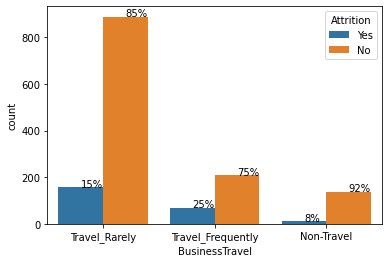

In [36]:
ax = sns.countplot(x=df["BusinessTravel"], hue=df["Attrition"])
patch = ax.patches
half = int(len(patch)/2)
for i in range(half):
  pat_1= patch[i]
  pat_2 = patch[i+half]
  height_1 = pat_1.get_height()
  height_2 = pat_2.get_height()
  total = height_1  + height_2
  width_1 = pat_1.get_x()+pat_1.get_width()/2
  width_2 = pat_2.get_x()+pat_2.get_width()/2
  ax.text(width_1,height_1+1,"{:.0%}".format(height_1/total))
  ax.text(width_2,height_2+1,"{:.0%}".format(height_2/total))

In [37]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

In [38]:
df["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [39]:
df.select_dtypes("object").columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [40]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [41]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [42]:
df["BusinessTravel"].dtype == "object"

True

In [43]:
df.shape

(1470, 31)

# Encoding

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
le = LabelEncoder()

In [46]:
le_count = 0
le_columns = []
for col in df.columns:
    if df[col].dtype == "object" and df[col].nunique() <= 2:
        df[col] = le.fit_transform(df[col])
        le_count += 1
        le_columns.append(col)

In [47]:
le_count

3

In [48]:
le_columns

['Attrition', 'Gender', 'OverTime']

In [49]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [50]:
df.shape

(1470, 31)

In [51]:
df.select_dtypes(include=['object']).columns

Index(['BusinessTravel', 'Department', 'EducationField', 'JobRole',
       'MaritalStatus'],
      dtype='object')

In [52]:
df = pd.get_dummies(df, drop_first=True)

In [53]:
df.shape

(1470, 45)

In [54]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,...,0,1,0,0,0,0,0,0,1,0


## Scaling

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#columns = list(df.columns)
#olumns.remove("Attrition")
for column in df.columns:
    df[column] = scaler.fit_transform(df[[column]])
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,1.0,0.715820,0.000000,0.25,0.333333,0.0,0.914286,0.666667,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.738095,0.0,0.126700,0.250000,0.00,0.666667,1.0,0.442857,0.333333,0.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.452381,1.0,0.909807,0.035714,0.25,1.000000,1.0,0.885714,0.333333,0.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,0.0,0.923407,0.071429,0.75,1.000000,0.0,0.371429,0.666667,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.214286,0.0,0.350036,0.035714,0.00,0.000000,1.0,0.142857,0.666667,0.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Splitting 

In [56]:
target = df["Attrition"].copy()
df = df.drop(["Attrition"], axis=1)

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, target, 
                                                    test_size=0.25, 
                                                    random_state=42, 
                                                    stratify=target)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1102, 44)
X_test shape:  (368, 44)
y_train shape:  (1102,)
y_test shape:  (368,)


# Building models

In [58]:
# selection of algorithms

models = []
models.append(("Logistic Regression", LogisticRegression(solver="liblinear", 
                                                         class_weight="balanced", 
                                                         random_state=42)))
models.append(("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)))
models.append(("SVM", SVC(random_state=42)))
models.append(("KNN", KNeighborsClassifier()))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=42)))
models.append(("Gaussian NB", GaussianNB()))

In [59]:
# evaluation of each model by cross-validation

basemodel_result = pd.DataFrame(columns=["Model", "ROC AUC mean %", "ROC AUC std %"])
cv_results = pd.DataFrame()
i = 0
for name, model in models:
    cv = cross_val_score(model, X_train, y_train, cv=10, scoring="roc_auc")
    cv_results[name] = cv
    basemodel_result.loc[i] = [
        name,
        round(cv.mean() * 100, 2),
        round(cv.std() * 100, 2),
    ]
    i += 1

basemodel_result

,Model,ROC AUC mean %,ROC AUC std %
0,Logistic Regression,82.85,4.97
1,Random Forest,81.45,6.14
2,SVM,82.71,5.34
3,KNN,68.54,8.70
4,Decision Tree,62.79,5.41
5,Gaussian NB,75.44,5.25


In [126]:
# results of 10-fold cross-validation for each model
cv_results

,Logistic Regression,Random Forest,SVM,KNN,Decision Tree,Gaussian NB
0,0.829152,0.846476,0.855436,0.727001,0.690860,0.766428
1,0.821386,0.794803,0.868578,0.632318,0.569892,0.772401
2,0.863378,0.889943,0.843770,0.672676,0.716319,0.814042
3,0.753953,0.811195,0.802024,0.535737,0.542378,0.702720
4,0.723430,0.680254,0.679348,0.624396,0.589976,0.667874
5,0.871981,0.848732,0.847222,0.779891,0.624396,0.777778
6,0.881039,0.869565,0.872585,0.864432,0.657005,0.756643
7,0.818841,0.785628,0.814010,0.625604,0.673913,0.756643
8,0.864130,0.870169,0.841184,0.689915,0.635266,0.844203
9,0.857488,0.747886,0.846618,0.702295,0.579106,0.685386


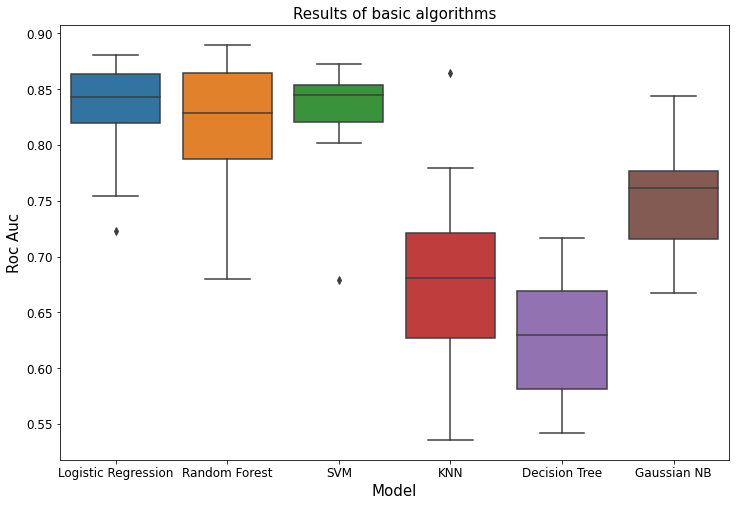

In [60]:
# visualization of model performance

plt.figure(figsize=(12, 8))
sns.boxplot(data=cv_results)
plt.title("Results of basic algorithms", fontsize=15)
plt.ylabel("Roc Auc", fontsize=15)
plt.xlabel("Model", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Наилучшие результаты показали модели логистической регрессии, случайного леса и  метод опорных векторов. Именно эти модели будут выбраны для дальнейшего улучшения.

# Logistic Regression

In [61]:
# tuning model hyperparameters using grid search

model_lr = LogisticRegression(class_weight="balanced", solver="liblinear")
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
params_lr = {"C": np.arange(0.01, 10, 0.1), "penalty": ["l1", "l2"]}
grid_lr = GridSearchCV(
    estimator=model_lr,
    param_grid=params_lr,
    cv=folds,
    scoring="roc_auc",
    return_train_score=True,
    n_jobs=4,
)

grid_lr.fit(X_train, y_train)
best_estimator_lr = grid_lr.best_estimator_    #optimized Logistics Regression
results_lr = grid_lr.cv_results_

print("=" * 60 + "\n")
print("Best estimator: ", grid_lr.best_estimator_)
print("Best parameters: ", grid_lr.best_params_)
print("Best roc_auc score on training dataset: ", grid_lr.best_score_)
print("=" * 60 + "\n")


Best estimator:  LogisticRegression(C=3.91, class_weight='balanced', solver='liblinear')
Best parameters:  {'C': 3.91, 'penalty': 'l2'}
Best roc auc score:  0.8353103123749112



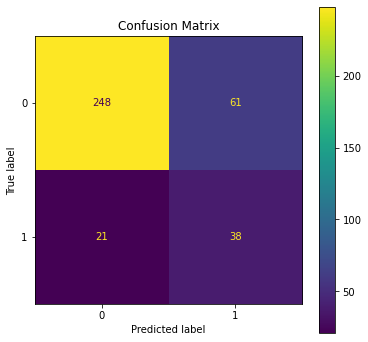

In [62]:
# predicting values on a test dataset
y_pred_lr = best_estimator_lr.predict(X_test)
y_pred_proba_lr = best_estimator_lr.predict_proba(X_test)

# build a confusion matrix
matrix = confusion_matrix(y_test, y_pred_lr)
cmp = ConfusionMatrixDisplay(confusion_matrix=matrix)

fig, ax = plt.subplots(figsize=(6, 6))
cmp.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

In [63]:
# classification report
report = classification_report(y_test, y_pred_lr)
print(report)

# roc_auc score of an optimized model on a test dataset
print("=" * 60 + "\n")
print("roc_auc score on test dataset: ", roc_auc_score(y_test, y_pred_proba_lr[:, 1]))  # we used probabilities associated with the employee leaving

              precision    recall  f1-score   support

         0.0       0.92      0.80      0.86       309
         1.0       0.38      0.64      0.48        59

    accuracy                           0.78       368
   macro avg       0.65      0.72      0.67       368
weighted avg       0.84      0.78      0.80       368


roc_auc score in test sample:  0.8108167407163622


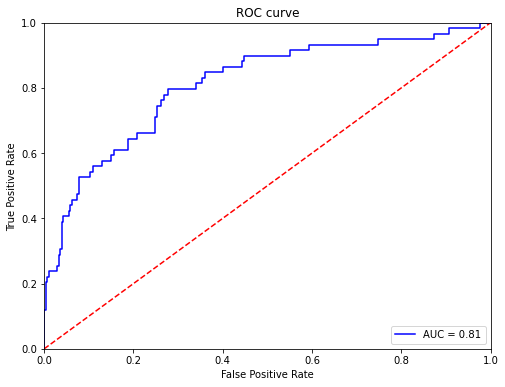

In [121]:
from sklearn.metrics import roc_curve, auc

probs = best_estimator_lr.predict_proba(X_test)
preds = probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title("ROC curve")
plt.plot(fpr, tpr, "b", label="AUC = %0.2f" % roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

# Random Forest

In [65]:
model_rf = RandomForestClassifier(class_weight="balanced", random_state=42)
params_rf = {
    "n_estimators": [75, 100, 150, 200],
    "min_samples_split": [2, 4, 6, 8, 10],
    "min_samples_leaf": [1, 2, 3, 4],
    "max_depth": [5, 10, 15, 20, 25],
}
grid_rf = GridSearchCV(
    estimator=model_rf,
    param_grid=params_rf,
    cv=folds,
    scoring="roc_auc",
    n_jobs=4,
    return_train_score=True,
)
grid_rf.fit(X_train, y_train)
best_estimator_rf = grid_rf.best_estimator_

print("=" * 60 + "\n")
print("Best estimator: ", best_estimator_rf)
print("Best parameters: ", grid_rf.best_params_)
print("Best roc auc score: ", grid_rf.best_score_)
print("=" * 60 + "\n")


Best estimator:  RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=150, random_state=42)
Best parameters:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}
Best roc auc score:  0.8178040407373797



In [66]:
y_pred_rf = best_estimator_rf.predict(X_test)
y_pred_rf_proba = best_estimator_rf.predict_proba(X_test)

report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

print("=" * 60 + "\n")
print("roc_auc score in test sample: ", roc_auc_score(y_test, y_pred_rf_proba[:,1]))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       309
         1.0       0.39      0.19      0.25        59

    accuracy                           0.82       368
   macro avg       0.63      0.57      0.58       368
weighted avg       0.78      0.82      0.80       368


roc_auc score in test sample:  0.7499862870934123


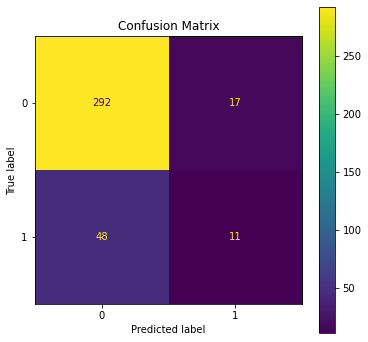

In [118]:
matrix_rf = confusion_matrix(y_test, y_pred_rf)
cmp_rf = ConfusionMatrixDisplay(confusion_matrix=matrix_rf)


fig, ax = plt.subplots(figsize=(6, 6))
cmp_rf.plot(ax=ax)
plt.title("Confusion Matrix")
plt.show()

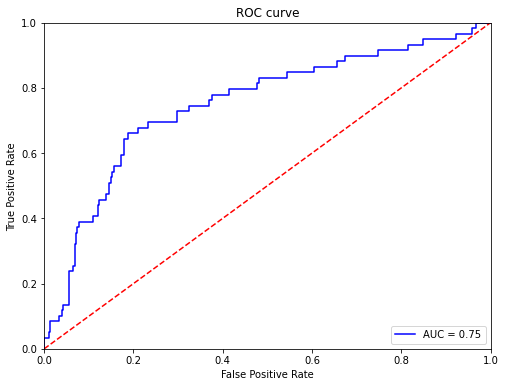

In [122]:
preds_rf = y_pred_rf_proba[:, 1]
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, preds_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.title("ROC curve")
plt.plot(fpr_rf, tpr_rf, "b", label="AUC = %0.2f" % roc_auc_rf)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [100]:
feature_importance = best_estimator_rf.feature_importances_
indexes = np.argsort(feature_importance)[::-1]
df_feature_coeff = pd.DataFrame(columns=["feature", "importance coeff"])
for i, index in enumerate(indexes):
    feature = X_train.columns[index]
    coeff = feature_importance[index]
    df_feature_coeff.loc[i] = (feature, coeff)
    
df_feature_coeff.sort_values("importance coeff", ascending=False, inplace=True)
df_feature_coeff.head()

,feature,importance coeff
0,MonthlyIncome,0.070126
1,Age,0.066319
2,TotalWorkingYears,0.064751
3,OverTime,0.051343
4,YearsWithCurrManager,0.050192


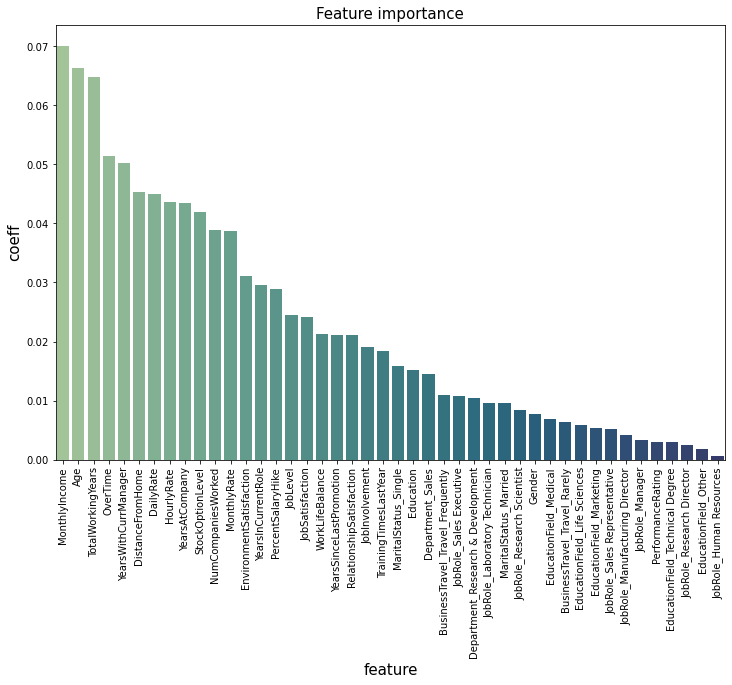

In [117]:
plt.figure(figsize=(12, 8))
sns.barplot(data = df_feature_coeff, x="feature", y="importance coeff", palette="crest")
plt.title("Feature importance", fontsize=15)
plt.ylabel("coeff", fontsize=15)
plt.xlabel("feature", fontsize=15)
plt.xticks(rotation=90)
plt.show()